In [1]:
import pandas as pd

In [4]:
import sys

# DEA tools
sys.path.append('/home/jovyan/PlanetaryComputerExamples/CODE/grits/deafrica_tools/')
from plotting import display_map, rgb, map_shapefile

# grits
sys.path.append('/home/jovyan/PlanetaryComputerExamples/CODE/grits/')
from grits import humanbytes, get_field, get_lims, get_mms, query_l2a_items, xr_rasterize, calculate_indices


In [7]:


%%time
# the basics
import rich.table

# packages that have to be installed every runtime
import subprocess
import pkg_resources

required = {'rasterstats','odc-ui'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# for PC, stac, xarray
import odc.stac
import stackstac
from xrspatial import zonal_stats

CPU times: user 16 ms, sys: 3.95 ms, total: 20 ms
Wall time: 19.3 ms


### get farms

In [9]:
path = '/home/jovyan/PlanetaryComputerExamples/vetorial/FAZENDAS/'

got bbox, lat_range, lon_range
   parte                                           geometry
0      1  MULTIPOLYGON (((-54.57278 -16.93966, -54.57686...
1      2  MULTIPOLYGON (((-54.57825 -16.95894, -54.57660...
2      3  MULTIPOLYGON (((-54.59494 -16.96052, -54.59700...
3      4  MULTIPOLYGON (((-54.65092 -16.95305, -54.65196...


<Axes: >

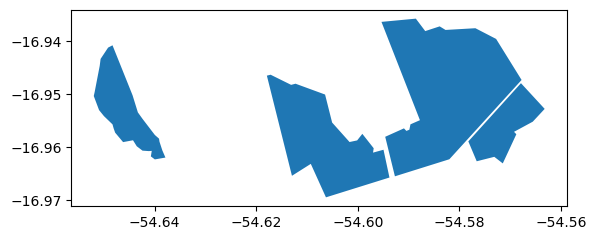

In [10]:
field = gpd.read_file( path + 'fazenda_uniguiri.gpkg')
bbox, lat_range, lon_range = get_lims(field)

print(field.head())
field.plot()

In [12]:
# para um grupo dentro de uma farm
layer = 'piquetes_tid'
column = 'Re'
val = 80000

field = gpd.read_file( path + 'fazenda_uniguiri.gpkg' , layer=layer)
field = field[field[column] == val]

bbox, lat_range, lon_range = get_lims(field)

print(field.head())

# plotting a partir do TID
style={'opacity': 6, 'stroke': 2,'dashArray': '1', 'fillOpacity': 0.5}
map_shapefile(field,'TID',cmap='Set1', **style )

got bbox, lat_range, lon_range
    PID  area_ha    R   ID      SR     Re   Fi     TID  \
0  R8_4      6.4  R8_    4  100000  80000    4  180004   
1     F     10.6    F  NaN  100000  80000  901  180901   
2  R8_5      6.9  R8_    5  100000  80000    5  180005   
3     C      0.7    C  NaN  100000  80000  801  180801   
4  R8_1      6.7  R8_    1  100000  80000    1  180001   

                                            geometry  
0  MULTIPOLYGON (((-54.57526 -16.95986, -54.57705...  
1  MULTIPOLYGON (((-54.57224 -16.96252, -54.57131...  
2  MULTIPOLYGON (((-54.57705 -16.96167, -54.57526...  
3  MULTIPOLYGON (((-54.56787 -16.95268, -54.56744...  
4  MULTIPOLYGON (((-54.57109 -16.95544, -54.57249...  


Label(value='')

Map(center=[-16.955265352726073, -54.57066140325033], controls=(ZoomControl(options=['position', 'zoom_in_text…